In [ ]:
#this file just so that we can do the stuff we need for the report

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filenames = [i for i in os.listdir('Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/') if i.endswith(".dat")]

In [3]:
all_data = pd.DataFrame()

for i in range(len(filenames)):

    data = pd.read_csv(f'Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/{filenames[i]}', delimiter="\t", index_col = "sample")
    
    data["file"] = i

    all_data = pd.concat([all_data, data])
    

In [4]:
all_data.reset_index(inplace=True)

In [5]:
all_data["time"] = all_data["sample"] / 8000

In [45]:
all_data["FLOATMAG_ACC_ADC_PORT_0"] = -all_data["FLOATMAG_ACC_ADC_PORT_0"]

Text(0, 0.5, 'Command Position (um)')

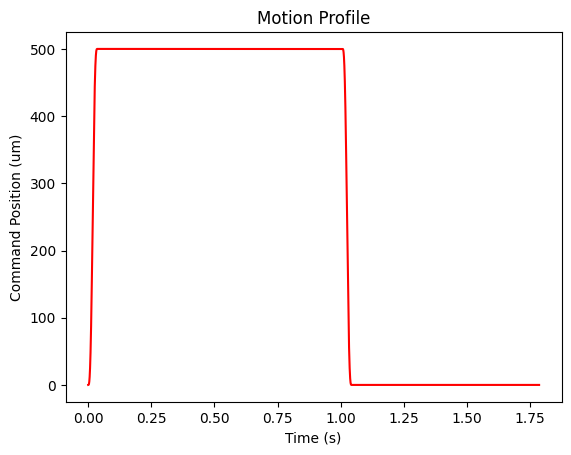

In [15]:
plt.plot(all_data[all_data["file"] == 15]['time'], all_data[all_data["file"] == 15]['CMD_POS_FLOATMAG_BH'] / 200, "r")

plt.title("Motion Profile")
plt.xlabel("Time (s)")
plt.ylabel("Command Position (um)")

Text(0, 0.5, 'Command Position (um)')

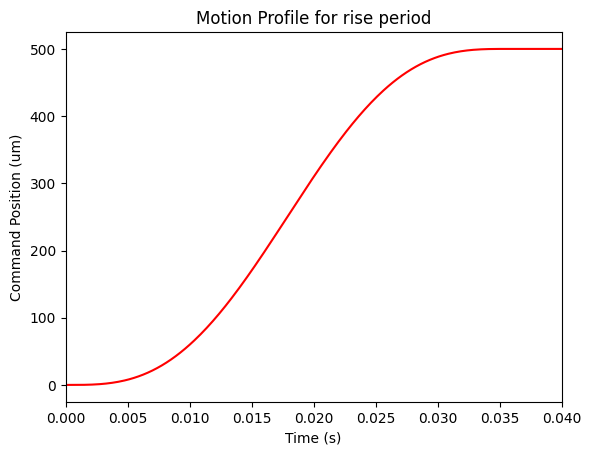

In [25]:
plt.plot(all_data[all_data["file"] == 15]['time'], all_data[all_data["file"] == 15]['CMD_POS_FLOATMAG_BH'] / 200, "r")

plt.xlim(0, 0.04)

plt.title("Motion Profile for rise period")
plt.xlabel("Time (s)")
plt.ylabel("Command Position (um)")

In [ ]:
#[can comment on if accuracy of encoder is less than or greater than average difference between timestep]

In [92]:
#what is average difference in encoder reading between timesteps?

all_data[all_data["sample"] < 285].groupby("file")["ENC_POS_FLOATMAG_BH"].diff().mean()

#mean difference between timesteps in rise period is 350 (count) = 1.25um

350.4518779342723

In [108]:
100000 / 500

200.0

Text(0.5, 1.0, '(Encoder Position, Command position) vs Time')

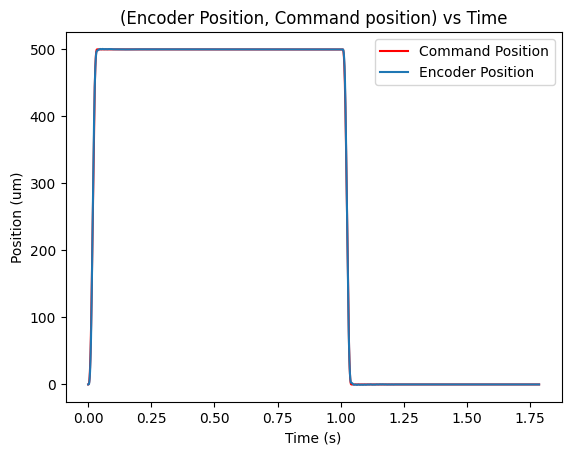

In [22]:
file_indx = 15
plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["CMD_POS_FLOATMAG_BH"] / 200, label = "Command Position", color = "r")
plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, label = "Encoder Position", color = "#1f77b4")
plt.xlabel("Time (s)")
plt.ylabel("Position (um)")

plt.legend()
plt.title("(Encoder Position, Command position) vs Time")

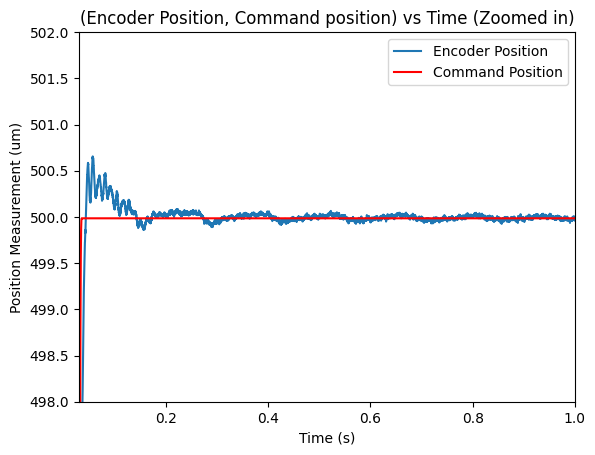

In [284]:
file_indx = 15
plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, label = 'Encoder Position')
plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["CMD_POS_FLOATMAG_BH"] / 200, 'r', label = 'Command Position')
plt.xlim(0.03, 1)
# plt.xlim(0.03, 0.08)
plt.ylim(498, 502)
plt.xlabel("Time (s)")
plt.ylabel("Position Measurement (um)")
plt.title("(Encoder Position, Command position) vs Time (Zoomed in)")
plt.legend()


In [154]:
all_data.columns

Index(['sample', 'CMD_POS_FLOATMAG_BH', 'ENC_POS_FLOATMAG_BH',
       'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH', 'MODE_FLOATMAG_BH',
       'FLOATMAG_ACC_ADC_PORT_0', 'file', 'time'],
      dtype='object')

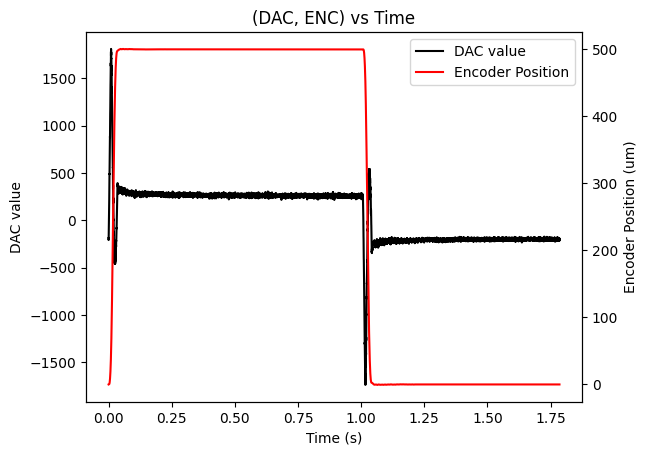

In [250]:
file_indx = 15

fig, ax1 = plt.subplots()

dac_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["DAC_FLOATMAG_BH"], 'black', label='DAC value')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("DAC value")

ax2 = ax1.twinx()
cmd_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r', label='Encoder Position (um)')
ax2.set_ylabel("Encoder Position (um)")

# Create a legend for both plots that are stacked vertically
plt.legend([dac_plot, cmd_plot], ['DAC value', 'Encoder Position'], loc='upper right')

plt.title("(DAC, ENC) vs Time")
plt.show()

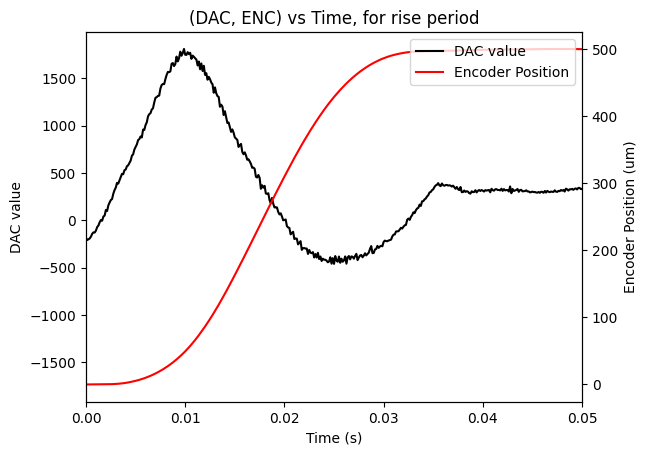

In [254]:
file_indx = 15

fig, ax1 = plt.subplots()

dac_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["DAC_FLOATMAG_BH"], 'black')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("DAC value")

ax2 = ax1.twinx()
cmd_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r')
ax2.set_ylabel("Encoder Position (um)")

plt.xlim(0, 0.05)

# Create a legend for both plots that are stacked vertically
plt.legend([dac_plot, cmd_plot], ['DAC value', 'Encoder Position'], loc='upper right')


# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(DAC, ENC) vs Time, for rise period")

plt.show()

In [111]:
def low_pass(array, sampling_rate = 8000, cutoff_frequency = 200):
    from scipy.signal import butter, filtfilt

    # Calculate the Nyquist frequency
    nyquist_frequency = sampling_rate / 2.0

    filter_order = 2  # Second-order filter, can be increased for a steeper roll-off

    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(filter_order, normal_cutoff, btype='low', analog=False)

    filtered_array = (filtfilt(b, a, array))

    return filtered_array

In [121]:
15 / 8000 * 1000

1.875

In [ ]:
all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 10).mean().diff().diff() * 100

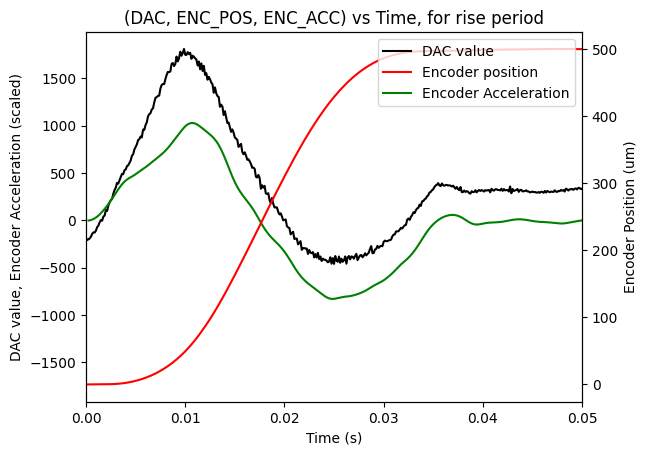

In [119]:
file_indx = 15

fig, ax1 = plt.subplots()

dac_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["DAC_FLOATMAG_BH"], 'black')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("DAC value, Encoder Acceleration (scaled)")

ax2 = ax1.twinx()
cmd_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r')
ax2.set_ylabel("Encoder Position (um)")

# ENC_ACC_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 10).mean().diff().diff() * 100, 'g')
ENC_ACC_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], pd.Series(low_pass(all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"], cutoff_frequency=250)).diff().diff() * 100, 'g')


plt.xlim(0, 0.05)

# Create a legend for both plots that are stacked vertically
# plt.legend([dac_plot, cmd_plot], ['DAC value', 'CMD value'], loc='upper right')
plt.legend([dac_plot, cmd_plot, ENC_ACC_plot], ['DAC value', 'Encoder position', 'Encoder Acceleration'], loc='upper right')

# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(DAC, ENC_POS, ENC_ACC) vs Time, for rise period")

plt.show()

(0.0, 1.0)

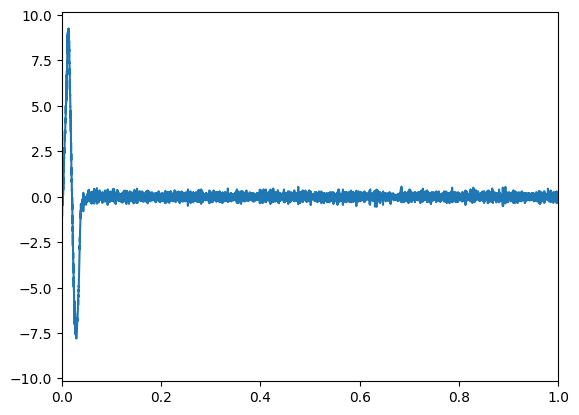

In [34]:
# plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 10).mean())
# plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 10).mean().diff() * 150)
plt.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 40).mean().diff().diff())
plt.xlim(0, 1)

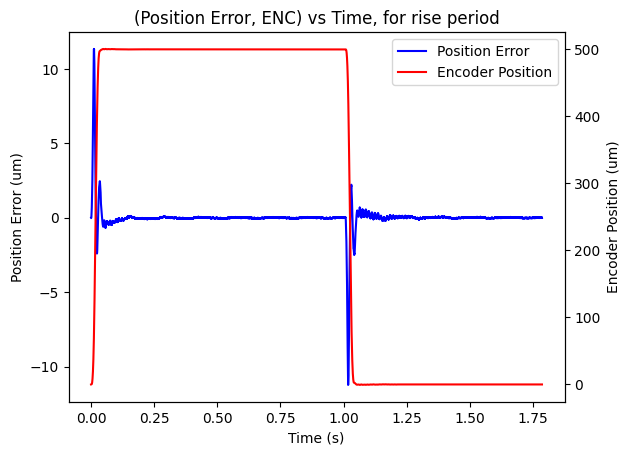

In [276]:


file_indx = 15

fig, ax1 = plt.subplots()

pos_error_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], (all_data[all_data["file"] == file_indx]["CMD_POS_FLOATMAG_BH"] / 200) - (all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200), 'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position Error (um)")


ax2 = ax1.twinx()
enc_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r')
ax2.set_ylabel("Encoder Position (um)")

# plt.xlim(0, 0.2)

# Create a legend for both plots that are stacked vertically
plt.legend([pos_error_plot, enc_plot], ['Position Error', 'Encoder Position'], loc='upper right')


# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(Position Error, ENC) vs Time, for rise period")

plt.show()

In [277]:
all_data

,sample,CMD_POS_FLOATMAG_BH,ENC_POS_FLOATMAG_BH,POS_ERR_FLOATMAG_BH,DAC_FLOATMAG_BH,MODE_FLOATMAG_BH,FLOATMAG_ACC_ADC_PORT_0,file,time
0,0,-3.0,-3.0,0.0,-203.0,ff010001,-125.0,0,0.000000
1,1,-3.0,-2.0,-1.0,-209.0,ff010001,190.0,0,0.000125
2,2,-3.0,-2.0,-1.0,-206.0,903000a,-77.0,0,0.000250
3,3,-3.0,-4.0,1.0,-182.0,903000a,95.0,0,0.000375
4,4,-3.0,-1.0,-2.0,-191.0,903000a,-97.0,0,0.000500
...,...,...,...,...,...,...,...,...,...
225863,7791,99997.0,99998.0,-1.0,262.0,ff010001,-49.0,29,0.973875
225864,7792,99997.0,99998.0,-1.0,252.0,ff010001,-65.0,29,0.974000
225865,7793,99997.0,99998.0,-1.0,250.0,ff010001,25.0,29,0.974125
225866,7794,99997.0,99999.0,-2.0,245.0,ff010001,-73.0,29,0.974250


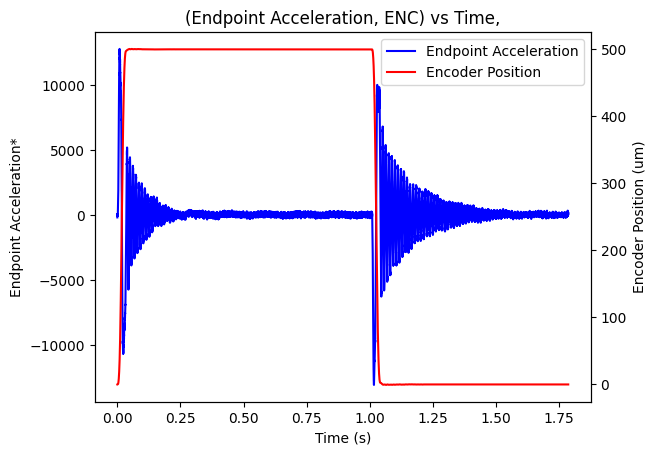

In [46]:
#we need typical accelerometer measurements for a single trial aswell

file_indx = 15

fig, ax1 = plt.subplots()

acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"], 'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Endpoint Acceleration")


ax2 = ax1.twinx()
enc_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r')
ax2.set_ylabel("Encoder Position (um)")

# plt.xlim(0, 0.2)

# Create a legend for both plots that are stacked vertically
plt.legend([acc_plot, enc_plot], ['Endpoint Acceleration', 'Encoder Position'], loc='upper right')


# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(Endpoint Acceleration, ENC) vs Time,")

plt.show()

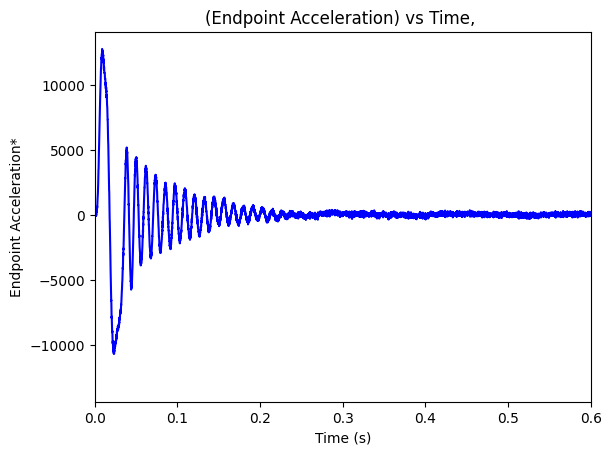

In [126]:
file_indx = 15

fig, ax1 = plt.subplots()

acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"], 'b')
# acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], low_pass(all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"], cutoff_frequency = 250), 'g') #just seeing impact of low pass filter
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Endpoint Acceleration*")
ax1.set_xlim(0, 0.6)



# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(Endpoint Acceleration) vs Time, ")

plt.show()

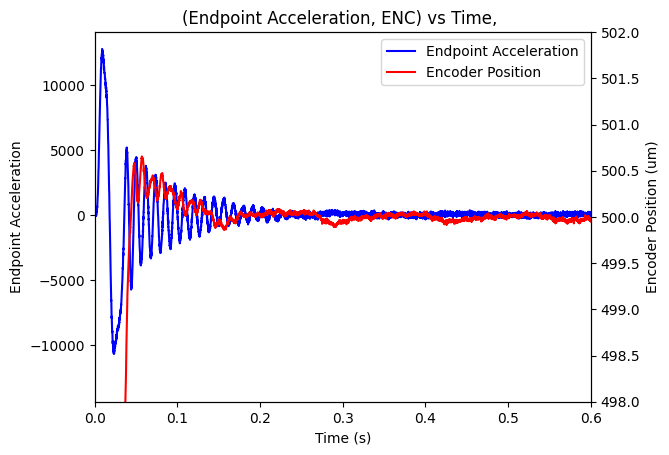

In [48]:
file_indx = 15

fig, ax1 = plt.subplots()

acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"], 'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Endpoint Acceleration")
ax1.set_xlim(0, 0.6)
# ax1.set_ylim(-7500, 7500)

ax2 = ax1.twinx()
enc_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"] / 200, 'r')
ax2.set_ylabel("Encoder Position (um)")


ax2.set_ylim(498, 502)

# # Create a legend for both plots that are stacked vertically
plt.legend([acc_plot, enc_plot], ['Endpoint Acceleration', 'Encoder Position'], loc='upper right')


# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(Endpoint Acceleration, ENC) vs Time, ")

plt.show()

Text(0.5, 1.0, '(ACC, ENC_ACC) vs Time')

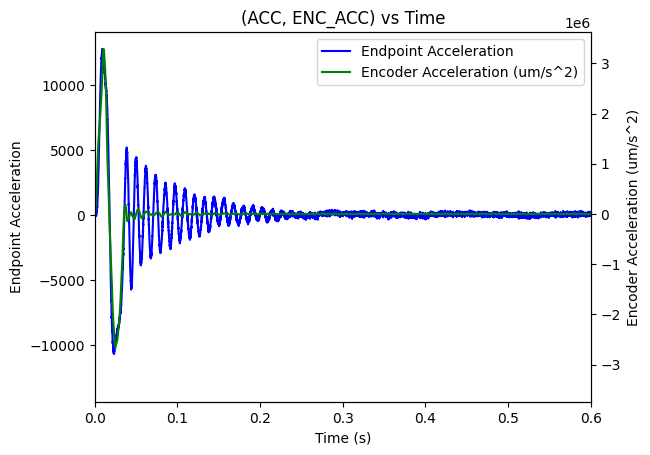

In [162]:
file_indx = 15

fig, ax1 = plt.subplots()

acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"], 'b', zorder = 100)
# acc_plot, = ax1.plot(all_data[all_data["file"] == file_indx]["time"], low_pass(all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"]), 'b', zorder = 100)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Endpoint Acceleration")
ax1.set_xlim(0, 0.6)


ax2 = ax1.twinx()

#ENC_ACC_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], (all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 20).mean() / 200).diff().diff() / (1/8000)**2, 'g', zorder = 1)
ENC_ACC_plot, = ax2.plot(all_data[all_data["file"] == file_indx]["time"], pd.Series(low_pass(all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].values / 200, cutoff_frequency=250)).diff().diff() / (1/8000)**2, 'g', zorder = 1) #low pass flter
ax2.set_ylabel("Encoder Acceleration (um/s^2)")

#to control which one is plotted first
# ax2.set_zorder(10)
# ax1.set_zorder(20)
# ax1.patch.set_visible(False)

# Create a legend for both plots that are stacked vertically
# plt.legend([dac_plot, cmd_plot], ['DAC value', 'CMD value'], loc='upper right')
plt.legend([acc_plot, ENC_ACC_plot], ['Endpoint Acceleration', 'Encoder Acceleration (um/s^2)'], loc='upper right')

# plt.title("(DAC, CMD) vs Time, for rise period")
plt.title("(ACC, ENC_ACC) vs Time")




In [148]:
(pd.Series(low_pass(all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].values / 200, cutoff_frequency=250)).diff().diff() / (1/8000)**2).max() / all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"].max() #scaling factor of 260 should be alright

# ((all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].ewm(span = 20).mean() / 200).diff().diff() / (1/8000)**2).max() / all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"].max()

257.69453241740314

In [194]:
pd.Series(low_pass((all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"] * 260), cutoff_frequency=250))

0       -56822.205854
1       -52137.610633
2       -47583.319254
3       -43290.094310
4       -39325.942677
             ...     
14279    23304.560868
14280    23398.177743
14281    23551.451097
14282    23737.237368
14283    23939.907651
Length: 14284, dtype: float64

In [195]:
#so scale factor is 260
from scipy.integrate import simps
# endpoint_velocity = (all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"] * 260).expanding().apply(lambda x: simps(x, dx=1/8000))
endpoint_velocity = pd.Series(low_pass((all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"] * 260), cutoff_frequency=250)).expanding().apply(lambda x: simps(x, dx=1/8000))

endpoint_position= endpoint_velocity.expanding().apply(lambda x: simps(x, dx=1/8000))



In [196]:
encoder_acceleration = pd.Series(low_pass(all_data[all_data["file"] == file_indx]["ENC_POS_FLOATMAG_BH"].values / 200, cutoff_frequency=250)).diff().diff() / (1/8000)**2

encoder_acceleration = encoder_acceleration.map(lambda x: 0 if np.isnan(x) else x)

encoder_velocity = (encoder_acceleration).expanding().apply(lambda x: simps(x, dx=1/8000))

encoder_position = encoder_velocity.expanding().apply(lambda x: simps(x, dx=1/8000))

(460.0, 490.0)

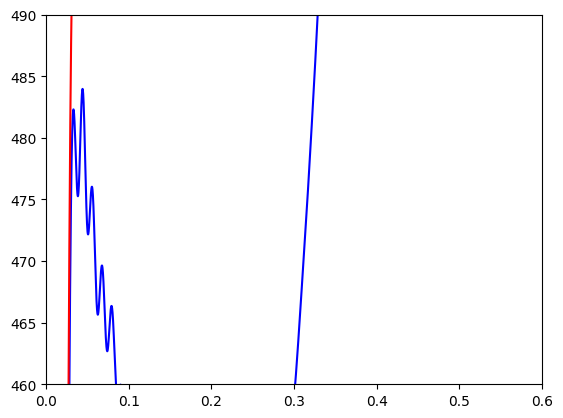

In [199]:
plt.plot(np.array(list(range(len(endpoint_position)))) / 8000, endpoint_position, "b")
plt.plot(np.array(list(range(len(endpoint_position)))) / 8000, encoder_position, "r")
plt.xlim(0, 0.6)
plt.ylim(460, 490)

In [ ]:
all_data[all_data["file"] == file_indx]["FLOATMAG_ACC_ADC_PORT_0"]



In [ ]:
#so we want some sort of comparison endpoint position vibration and encoder vibration

In [90]:
1/85 * 8000

94.11764705882352

In [377]:
from scipy.integrate import simps
data = all_data[all_data["file"] == file_indx]
data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"] - (-data["FLOATMAG_ACC_ADC_PORT_0"][:int(0.6*8000)].mean())).expanding().apply(lambda x: simps(x, dx=1/8000))
# data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"] - (-data["FLOATMAG_ACC_ADC_PORT_0"].expanding().mean())).expanding().apply(lambda x: simps(x, dx=1/8000))
# data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"] - (-data["FLOATMAG_ACC_ADC_PORT_0"].expanding().mean())).expanding().apply(lambda x: simps(x, dx=1/8000))
data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"]).expanding().apply(lambda x: simps(x, dx=1/8000))
data["endpoint_positon"] = data["endpoint_velocity"].expanding().apply(lambda x: simps(x, dx=1/8000))

/tmp/ipykernel_2132/1776092018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"] - (-data["FLOATMAG_ACC_ADC_PORT_0"][:int(0.6*8000)].mean())).expanding().apply(lambda x: simps(x, dx=1/8000))
/tmp/ipykernel_2132/1776092018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["endpoint_velocity"] = (-data["FLOATMAG_ACC_ADC_PORT_0"]).expanding().apply(lambda x: simps(x, dx=1/8000))
/tmp/ipykernel_2132/1776092018.py:7: SettingWithCopyWarning: 


(498.0, 502.0)

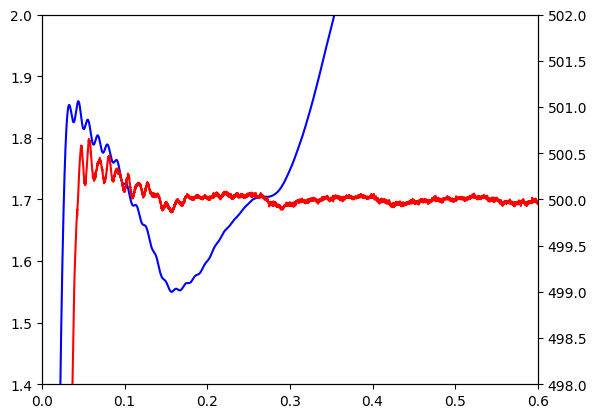

In [379]:
fig, ax1 = plt.subplots()

ax1.plot(data["time"], data["endpoint_positon"], "b")
ax1.set_xlim(0, 0.6)
ax1.set_ylim(1.4, 2)
ax2 = ax1.twinx()

ax2.plot(data["time"], data["ENC_POS_FLOATMAG_BH"] / 200, "r")
ax2.set_ylim(498, 502)



In [309]:
#lets get endpoint position for the first dataset we got sent

og_data = pd.read_csv("Data/DatalogWithoutGraph.csv")

In [382]:
og_data["ENC_X(um)"].index / 8000

Index([     0.0, 0.000125,  0.00025, 0.000375,   0.0005, 0.000625,  0.00075,
       0.000875,    0.001, 0.001125,
       ...
          0.214, 0.214125,  0.21425, 0.214375,   0.2145, 0.214625,  0.21475,
       0.214875,    0.215, 0.215125],
      dtype='float64', length=1722)

Text(0.5, 1.0, '(ENC, ENDPOINT) vs Time, *different motion profile')

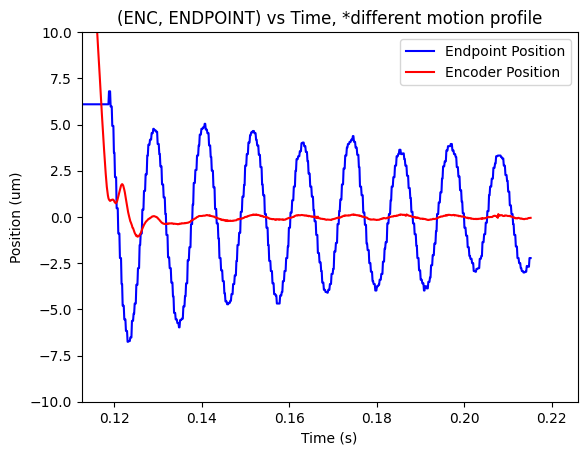

In [390]:
#based on old data

plt.plot(og_data["ENC_X(um)"].index / 8000, og_data["EndPoint_X(um)"], label = "Endpoint Position", color = "b")
plt.plot(og_data["ENC_X(um)"].index / 8000, og_data["ENC_X(um)"], label = "Encoder Position", color = "r")

plt.xlim(900 / 8000)
plt.ylim(-10, 10)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position (um)")
plt.title("(ENC, ENDPOINT) vs Time, *different motion profile")